### The provided code performs various data analysis tasks on the Airbnb dataset for Amsterdam. Here is a summary of the code's functionality:

1. Import the necessary libraries:

   - Import numpy, pandas, math, matplotlib and seaborn

   
2. Ignore future warnings using the following command:

   - warnings.simplefilter(action='ignore', category=FutureWarning)
   
3. Specify the path to the dataset folder using the following command:

   - path = "D:/@ old laptop/@a.CV & jobs/المبادرة/capstone/Capstone AirBnb/kaggle/Amsterdam"
   
4. Read the "listings.csv" file and convert it to a DataFrame using the following command:

   - listings = pd.read_csv('D:/@ old laptop/@a.CV & jobs/المبادرة/capstone/Capstone AirBnb/kaggle/Amsterdam/listings.csv')
   
5. Display the first few rows in the DataFrame using the command:

   - listings.head()
   
6. Get the column names as a list using the command:

   - listings.columns.tolist()
   
7. Get information about the data types and non-null values in each column using the command:

   - listings.info()
   
8. Count the occurrences of each value in the "neighbourhood_group" column using the command:

   - listings['neighbourhood_group'].value_counts
   
9. Remove the "neighbourhood_group" column from the DataFrame using the command:

   - listings.drop('neighbourhood_group', axis=1, inplace=True)
   
10. Check for duplicate IDs in the "id" column using the command:

    - listings['id'].nunique()
    
11. Remove the "id" column from the DataFrame using the command:

    - listings.drop('id', axis=1, inplace=True)
    
12. Count the listings for each host name using the command:

    - listings['host_name'].value_counts()
    
13. Display the numeric columns using the command:

    - listings.hist
    
14. Create a heatmap to visualize the correlation between numeric columns using the command:

    - sns.heatmap(listings.corr(), annot=True, cmap='coolwarm')
    
15. Analyze the distribution of rentals in Amsterdam neighborhoods:

    - Create a new DataFrame called "neighbourhood_distribution" containing the "latitude," "longitude," and "neighbourhood" columns from the original DataFrame.
    
16. Create a scatter plot to visualize the rental distribution in Amsterdam using the command:

    - plt.scatter(neighbourhood_distribution['longitude'], neighbourhood_distribution['latitude'], s=5, alpha=0.5)
    
17. Sort the "neighbourhood_distribution" DataFrame by "neighbourhood" column and assign different colors to each neighborhood using the command:

    - Define the desired colors.
    - Assign a different color to each neighborhood.
    - Create a larger scatter plot with different colors for each neighborhood using the command:    plt.scatter(neighbourhood_distribution_sorted[neighbourhood_distribution_sorted['neighbourhood'] == neighborhood]['longitude'], neighbourhood_distribution_sorted[neighbourhood_distribution_sorted['neighbourhood'] == neighborhood]['latitude'], s=5, alpha=0.5, color=color)
    
18. Create a horizontal bar plot to show the number of listings in each neighborhood using the command:

    - listings['neighbourhood'].value_counts().plot(kind='barh')
    
19. Analyze the available room types:

    - Calculate the count of each room type using the command:
    - room_types = listings['room_type'].value_counts()
    
20. Create a bar plot to visualize the room types using the command:

    - room_types.plot(kind='bar')
    
21. Create a DataFrame for host names and the count of listings for each host using the command:

    - hosts_names = listings['host_name'].value_counts()
    
22. Sort the "hosts_names" DataFrame in descending order and display the hosts with more than 50 listings using the command:

    - hosts_names[hosts_names > 50].sort_values(ascending=False)
    
23. Select the specific columns to view information related to the host "Martijn":

    - martijn_listings = listings[listings['host_name'] == 'Martijn'][['name', 'room_type', 'neighbourhood']]
    
24. Analyze the room types added by the host "Martijn":

    - Calculate the count of each room type in "martijn_listings" using the command:
    - martijn_room_types = martijn_listings['room_type'].value_counts()
    
25. Create a bar plot to visualize the room types added by the host "Martijn" using the command:

    - martijn_room_types.plot(kind='bar')
    
25. Analyze the neighborhoods where the host "Martijn" owns properties and compare them withother hosts:

    - Calculate the count of each neighborhood in "martijn_listings" using the command:
    - martijn_neighbourhoods = martijn_listings['neighbourhood'].value_counts()
    
27. Create a bar plot to visualize the neighborhoods where the host "Martijn" owns properties using the command:

    - martijn_neighbourhoods.plot(kind='bar')
    
28. Compare the neighborhoods where the host "Martijn" owns properties with the overall distribution of neighborhoods in Amsterdam:

    - Calculate the count of each neighborhood in the entire dataset using the command:
    - all_neighbourhoods = listings['neighbourhood'].value_counts()
    
29. Create a DataFrame to compare the neighborhoods using the command:

    - neighbourhood_comparison = pd.DataFrame({'Martijn': martijn_neighbourhoods, 'Overall': all_neighbourhoods})
    
30. Sort the "neighbourhood_comparison" DataFrame by the "Overall" column and display the top 10 neighborhoods using the command:

    - neighbourhood_comparison.sort_values(by='Overall', ascending=False).head(10)

In [108]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [109]:
import os
path = "D:/@ old laptop/@a.CV & jobs/المبادرة/capstone/Capstone AirBnb/kaggle/Amsterdam"
data_files = os.listdir(path)
data_files

['calendar.csv',
 'listings.csv',
 'listings_details.csv',
 'neighbourhoods.csv',
 'neighbourhoods.geojson',
 'reviews.csv',
 'reviews_details.csv']

In [110]:
listings = pd.read_csv('D:/@ old laptop/@a.CV & jobs/المبادرة/capstone/Capstone AirBnb/kaggle/Amsterdam/listings.csv')

In [111]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,2018-11-28,2.10,1,44
1,3209,"Quiet apt near center, great view",3806,Maartje,NaN,Westerpark,52.390225,4.873924,Entire home/apt,160,4,42,2018-08-29,1.03,1,47
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,NaN,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,233,2018-11-30,2.18,2,198
3,25428,Lovely apt in City Centre (Jordaan),56142,Joan,NaN,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,1,2018-01-21,0.09,2,141
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.386727,4.892078,Private room,150,2,171,2018-11-25,2.03,1,199


In [112]:
listings.columns.to_list()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [113]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20030 entries, 0 to 20029
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20030 non-null  int64  
 1   name                            19992 non-null  object 
 2   host_id                         20030 non-null  int64  
 3   host_name                       20026 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   20030 non-null  object 
 6   latitude                        20030 non-null  float64
 7   longitude                       20030 non-null  float64
 8   room_type                       20030 non-null  object 
 9   price                           20030 non-null  int64  
 10  minimum_nights                  20030 non-null  int64  
 11  number_of_reviews               20030 non-null  int64  
 12  last_review                     

In [114]:
# neighbourhood_group has no data :
listings.neighbourhood_group.value_counts()

Series([], Name: neighbourhood_group, dtype: int64)

In [115]:
listings = listings.drop('neighbourhood_group', axis = 1)

In [116]:
# it seems that no important data in columns: ('id', 'host_name')
print(listings.id.value_counts().count())


20030


In [117]:
listings = listings.drop('id', axis = 1)

In [118]:
# it seems that host name is important because it shows that some people hosted more than one time
# so we can use this information to ask how to be good hoster?
listings.host_name.value_counts()

Martijn             289
Michiel And Jane    105
Laura                98
Anne                 90
Marieke              88
                   ... 
Foke                  1
LotteThijs            1
Hendrikus             1
Yarin                 1
Poppy                 1
Name: host_name, Length: 5915, dtype: int64

### Let's take a quick look at the distribution of the data

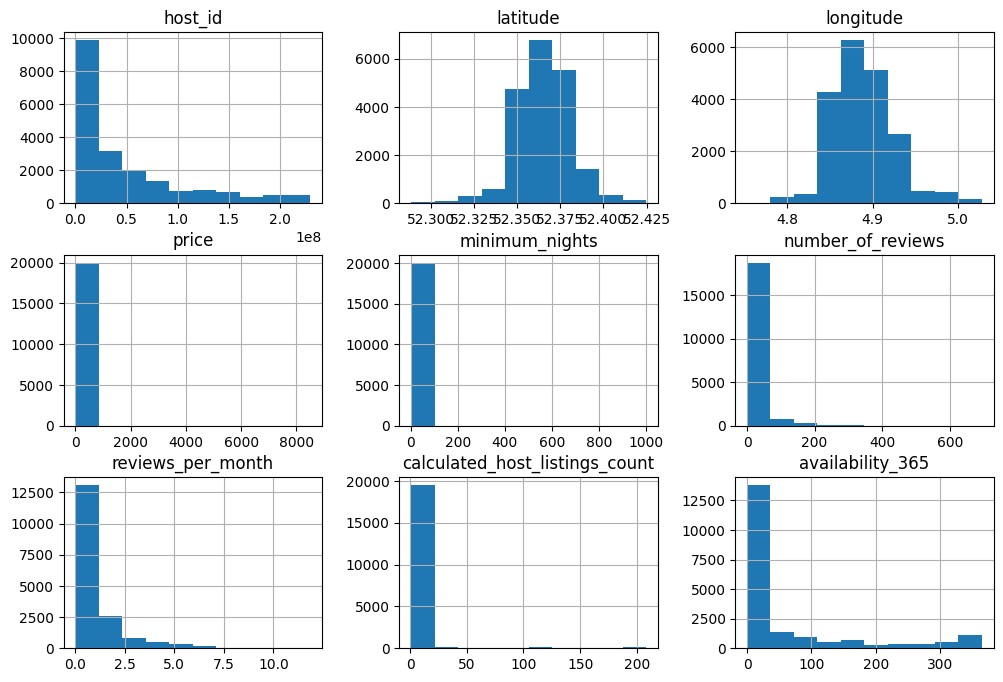

In [119]:
listings.hist(figsize=(12,8))
plt.show()

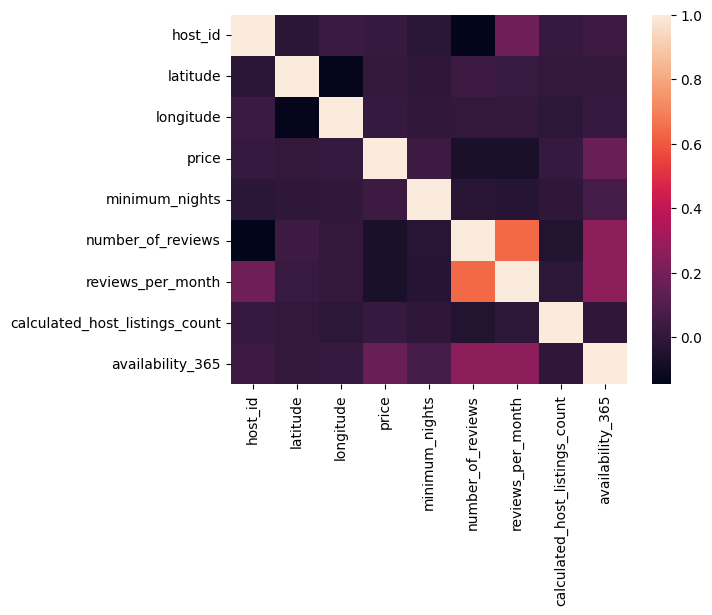

In [120]:
sns.heatmap(listings.corr())
plt.show()

***

### First we need to take a quick look at the rental distribution in the neighborhoods of Amsterdam
- to do this we need to select "latitude", "longitude" and "neighbourhood" and make a Scatter plot.

In [121]:
neighbourhood_distribution = pd.DataFrame(listings[['latitude', 'longitude', 'neighbourhood']])
neighbourhood_distribution

,latitude,longitude,neighbourhood
0,52.365755,4.941419,Oostelijk Havengebied - Indische Buurt
1,52.390225,4.873924,Westerpark
2,52.365087,4.893541,Centrum-Oost
3,52.373114,4.883668,Centrum-West
4,52.386727,4.892078,Centrum-West
...,...,...,...
20025,52.345999,4.952145,Watergraafsmeer
20026,52.362412,4.932467,Oostelijk Havengebied - Indische Buurt
20027,52.362431,4.926912,Oud-Oost
20028,52.363780,4.932493,Oostelijk Havengebied - Indische Buurt


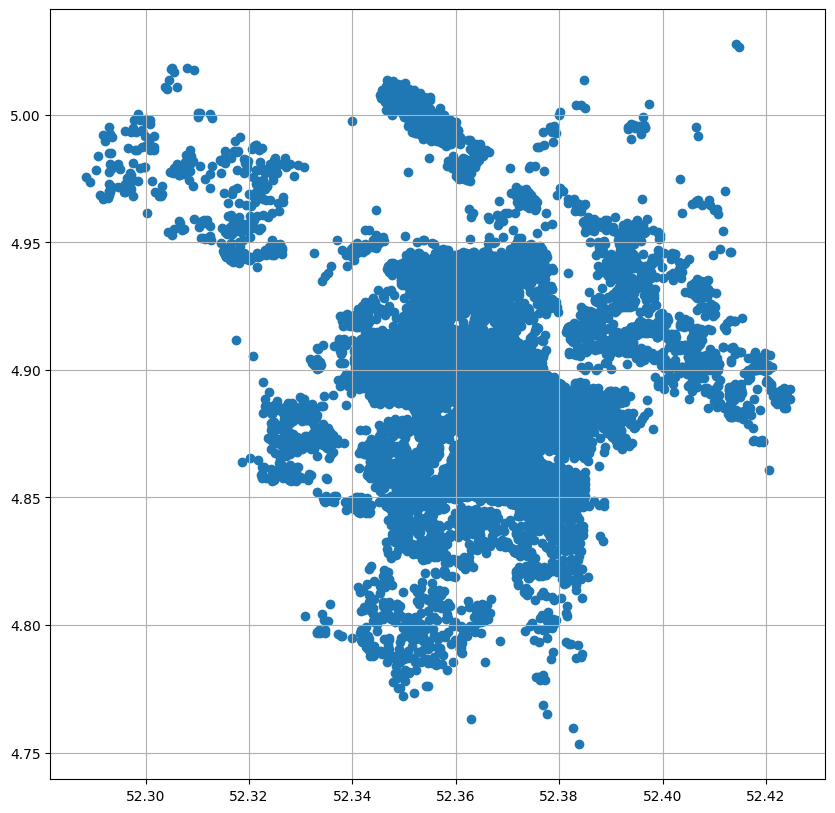

In [122]:
plt.figure(figsize=(10, 10))
x = neighbourhood_distribution['latitude']
y = neighbourhood_distribution['longitude']
plt.scatter(x, y)
plt.grid()
plt.show()

- to change color of each Amsterdam neighborhoods :

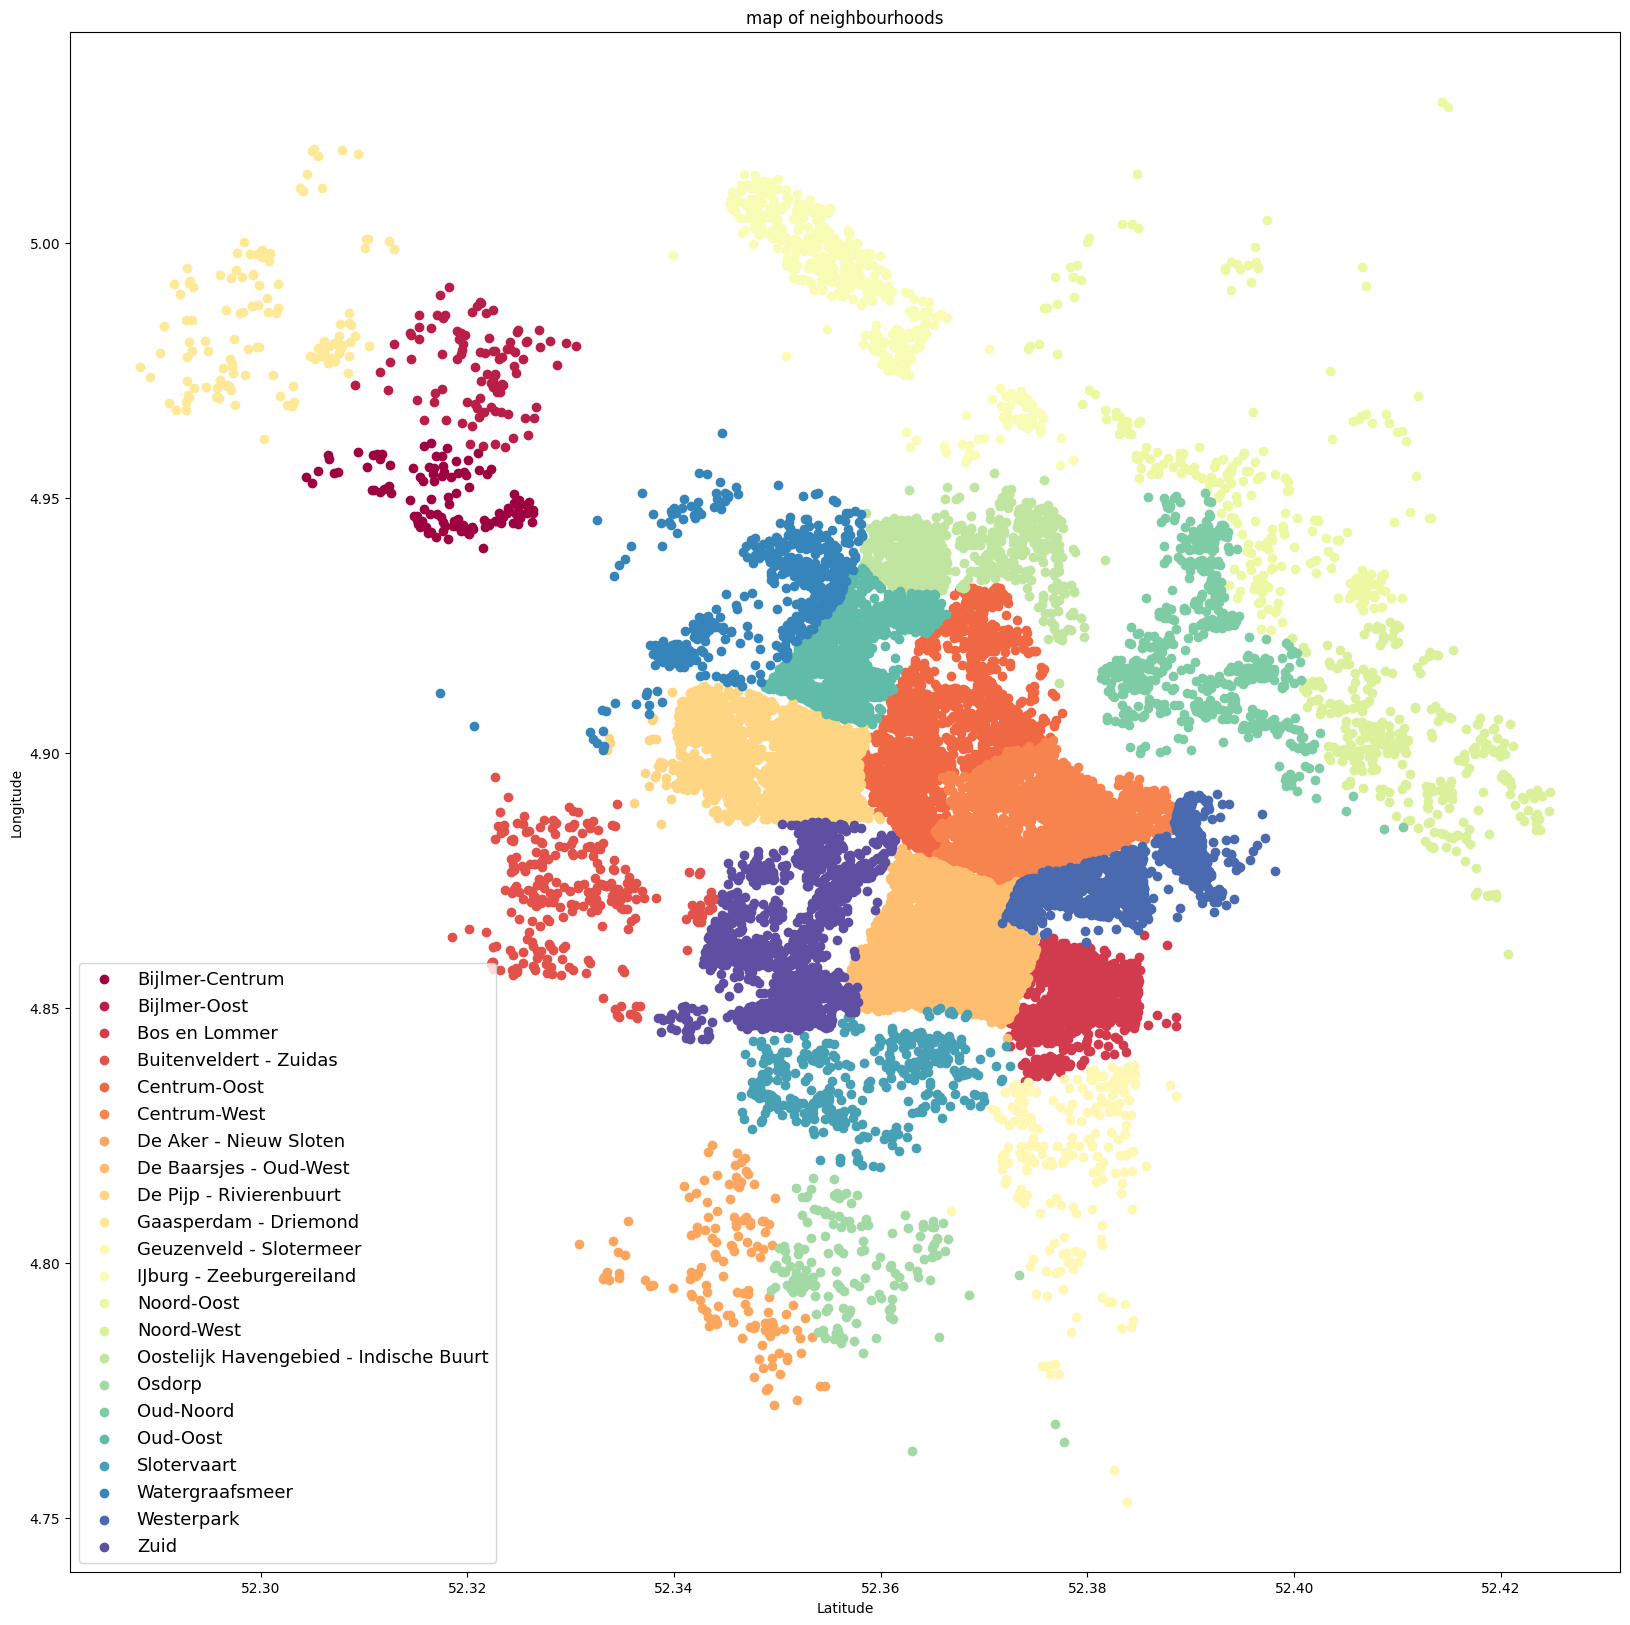

In [123]:
neighbourhood_distribution = neighbourhood_distribution.sort_values(by='neighbourhood')

num_colors = len(neighbourhood_distribution['neighbourhood'].unique())
colors = plt.cm.Spectral(np.linspace(0, 1, num_colors))

plt.figure(figsize=(20,20))
for i, (name, group) in enumerate(neighbourhood_distribution.groupby('neighbourhood')):
    plt.scatter(group['latitude'], group['longitude'], color=colors[i], label=name)

plt.title('map of neighbourhoods')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(loc = 'lower left', fontsize=13)
plt.show()

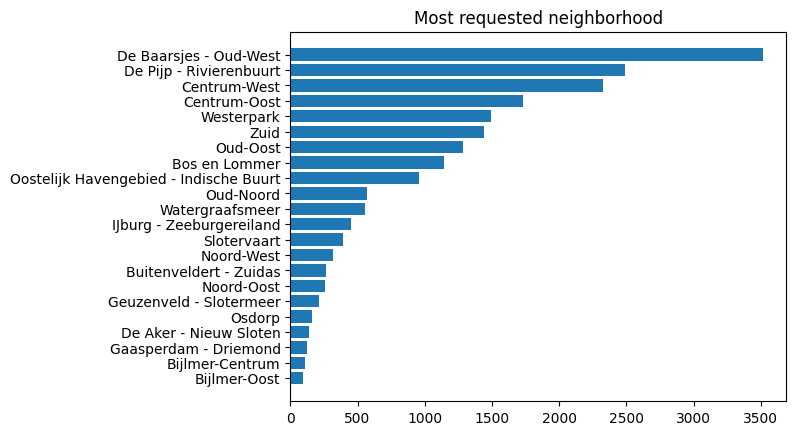

In [124]:
neighbourhood_sort = pd.DataFrame(neighbourhood_distribution['neighbourhood'].value_counts().sort_values())
plt.barh(neighbourhood_sort.index, neighbourhood_sort['neighbourhood'])
plt.title('Most requested neighborhood')
plt.show()

### we can see that the neighbourhood "De Baarsjes - Oud-West" is the most hosted neighbourhood!

### now we will  see what type of rooms are in greatest demand

In [125]:
room_types = pd.DataFrame(listings['room_type'].value_counts())
room_types

,room_type
Entire home/apt,15889
Private room,4076
Shared room,65


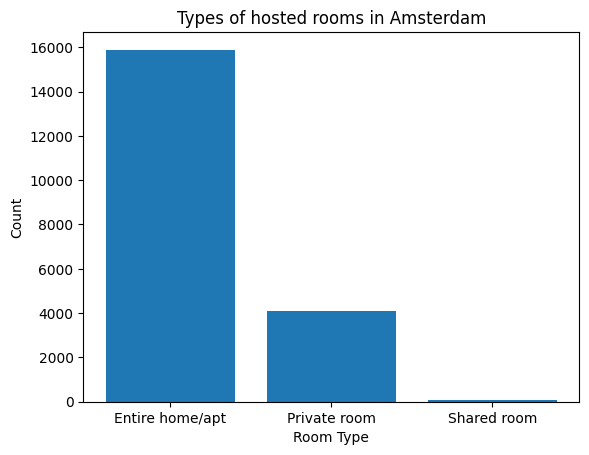

In [126]:
plt.bar(room_types.index, room_types['room_type'])
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Types of hosted rooms in Amsterdam')
plt.show()

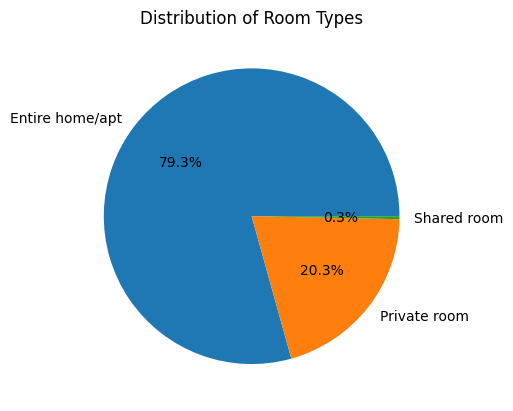

In [127]:
room_type_counts = listings['room_type'].value_counts()
plt.pie(room_type_counts.values, labels=room_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Room Types')
plt.show()

### we see that The most requested room types is "Entire home/apt"

### We want to see what distinguishes most hosts

In [128]:
listings.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [129]:
hosts_names = pd.DataFrame(listings['host_name'].value_counts().sort_values(ascending = False))
hosts_names.loc[hosts_names['host_name'] > 50]

,host_name
Martijn,289
Michiel And Jane,105
Laura,98
Anne,90
Marieke,88
Eva,88
Willem,87
Rated,83
Thomas,80
David,77


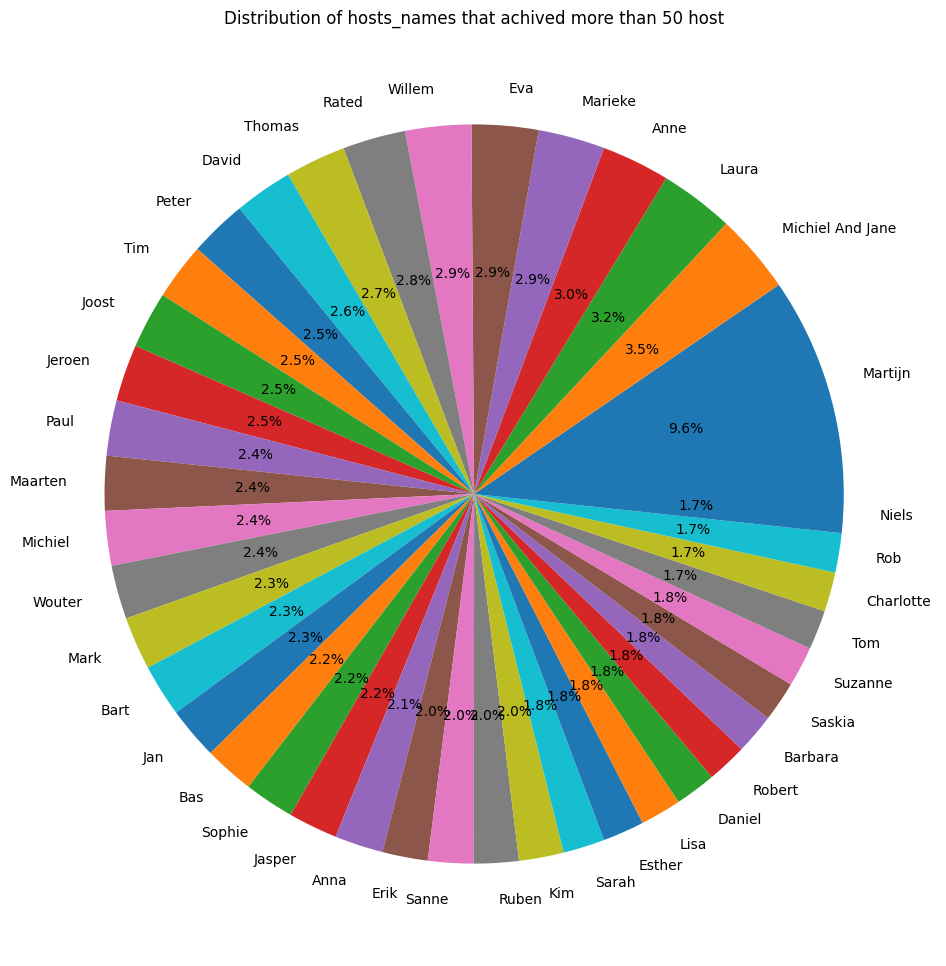

In [130]:
hosts_names_counts = listings['host_name'].value_counts().sort_values(ascending = False)
hosts_names_counts = hosts_names_counts.loc[hosts_names['host_name'] > 50]
fig = plt.figure(figsize=(12,12))
plt.pie(hosts_names_counts.values, labels=hosts_names_counts.index, autopct='%1.1f%%')
plt.title('Distribution of hosts_names that achived more than 50 host')
plt.show()

### we see that "Martijn" is the most sweeping one, but why?

In [131]:
most_hosts = listings[['host_name', 'neighbourhood', 'room_type', 'price', 'minimum_nights', 'availability_365']]
most_hosts.sort_values(by='host_name')

,host_name,neighbourhood,room_type,price,minimum_nights,availability_365
12008,(Email hidden by Airbnb),Zuid,Entire home/apt,250,2,0
8605,(Email hidden by Airbnb),Watergraafsmeer,Entire home/apt,125,3,0
6686,(Email hidden by Airbnb),Noord-Oost,Entire home/apt,49,6,0
11116,(Email hidden by Airbnb),Oud-Oost,Entire home/apt,105,3,0
726,(Email hidden by Airbnb),Westerpark,Entire home/apt,115,2,0
...,...,...,...,...,...,...
10855,雨婷,Zuid,Entire home/apt,108,1,0
3805,NaN,Centrum-Oost,Entire home/apt,60,3,0
6249,NaN,Bos en Lommer,Private room,119,1,0
8336,NaN,Osdorp,Private room,86,3,296


In [132]:
Martijn_info = most_hosts.loc[most_hosts['host_name'] == 'Martijn']
Martijn_info

,host_name,neighbourhood,room_type,price,minimum_nights,availability_365
67,Martijn,Bos en Lommer,Entire home/apt,99,2,64
276,Martijn,Watergraafsmeer,Entire home/apt,120,5,0
477,Martijn,De Pijp - Rivierenbuurt,Entire home/apt,150,1,355
634,Martijn,Oud-Oost,Entire home/apt,110,20,26
837,Martijn,Centrum-West,Entire home/apt,195,2,0
...,...,...,...,...,...,...
19776,Martijn,Zuid,Entire home/apt,114,2,8
19781,Martijn,Bos en Lommer,Entire home/apt,42,2,59
19884,Martijn,Bos en Lommer,Entire home/apt,100,2,16
19885,Martijn,Noord-West,Entire home/apt,88,2,8


In [133]:
Martijn_info_room_type = Martijn_info.room_type.value_counts()
Martijn_info_room_type

Entire home/apt    277
Private room        11
Shared room          1
Name: room_type, dtype: int64

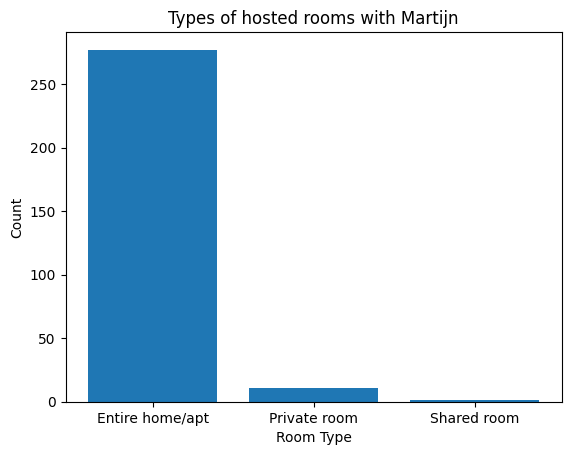

In [134]:
plt.bar(Martijn_info_room_type.index, Martijn_info_room_type)
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Types of hosted rooms with Martijn')
plt.show()

### We previously concluded that most people want to rent the entire apartment, and now we see that this option is very common with Martijn but what about neighbourhoods of  Martijn?

In [135]:
Martijn_info_neighbourhoods = pd.DataFrame(Martijn_info.neighbourhood.value_counts())
Martijn_info_neighbourhoods

,neighbourhood
De Baarsjes - Oud-West,61
De Pijp - Rivierenbuurt,46
Centrum-West,38
Westerpark,36
Centrum-Oost,22
Oud-Oost,20
Zuid,20
Bos en Lommer,16
Watergraafsmeer,6
Oostelijk Havengebied - Indische Buurt,6


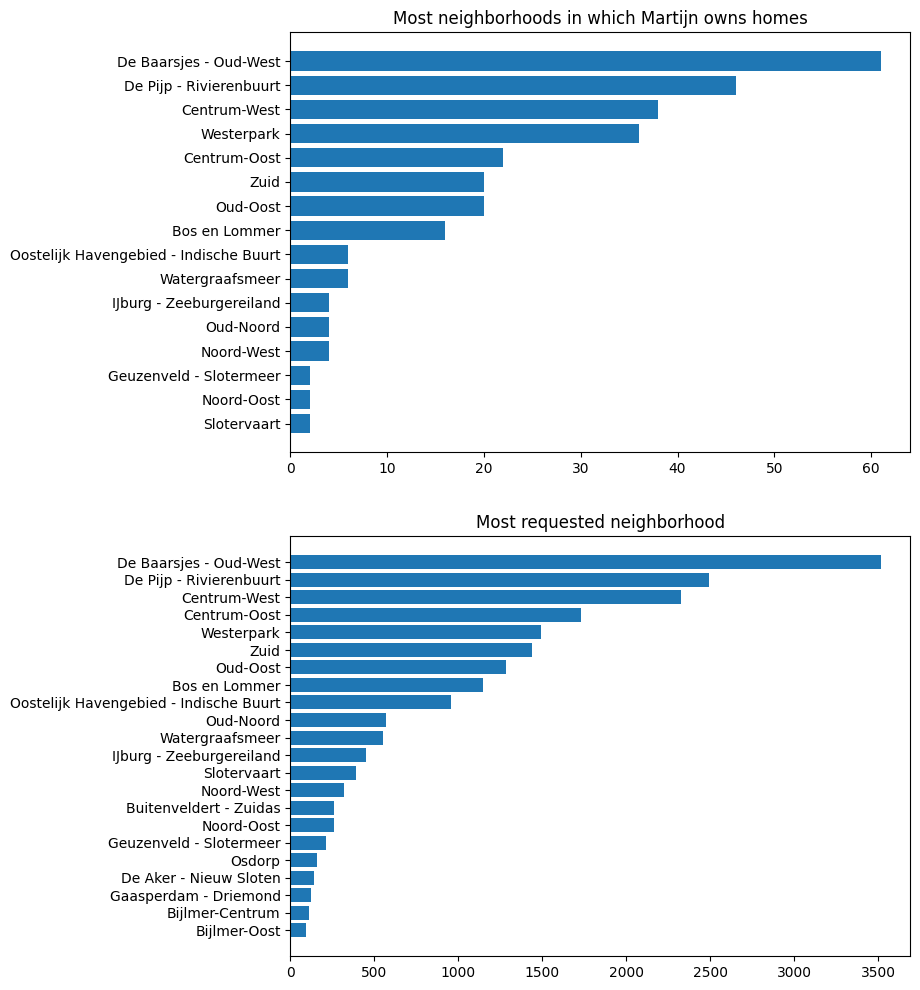

In [136]:
Martijn_info_neighbourhoods = Martijn_info_neighbourhoods.sort_values(by='neighbourhood')
fig, axis = plt.subplots(2,figsize=(8, 12))
axis[0].barh(Martijn_info_neighbourhoods.index, Martijn_info_neighbourhoods.neighbourhood)
axis[1].barh(neighbourhood_sort.index, neighbourhood_sort['neighbourhood'])
axis[0].set_title('Most neighborhoods in which Martijn owns homes')
axis[1].set_title('Most requested neighborhood')
plt.show()

### We find that Martijn owns many places for rent in Most requested neighborhood like:
- in 'De Baarsjes - Oud-West' he has 61 place
- in 'De Pijp - Rivierenbuurt'he has 46 place
- in 'Centrum-West' he has 38 place
- in 'Westerpark' he has 36 place
- in 'Centrum-Oost' he has 22 place

### but what about the prices of Martijn ?

In [137]:
Martijn_info_prices = pd.DataFrame(Martijn_info['price'].sort_values(ascending=False))
Martijn_info_prices

,price
2314,400
4855,399
7202,350
3018,350
8204,329
...,...
17551,55
17750,50
15021,50
19781,42


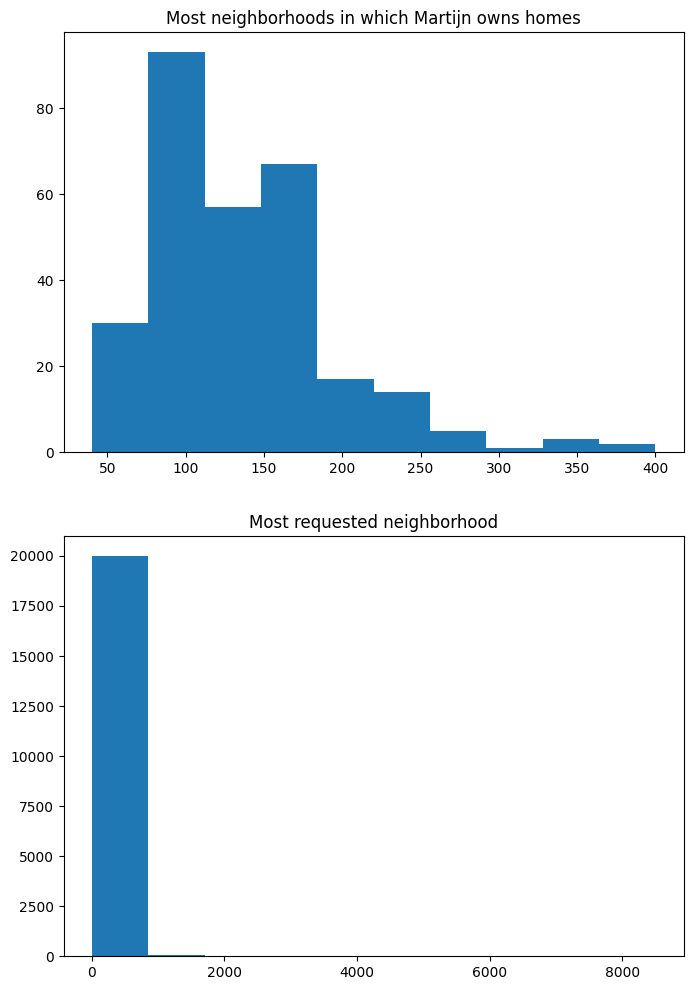

In [138]:
fig, axis = plt.subplots(2,figsize=(8, 12))
axis[0].hist(Martijn_info_prices)
axis[1].hist(listings['price'])
axis[0].set_title('Most neighborhoods in which Martijn owns homes')
axis[1].set_title('Most requested neighborhood')
plt.show()

### Martijn has a wide variety of prices that are affordable for everyone

***

### using the "Available_365" column to determine the availability of properties for booking throughout the year.

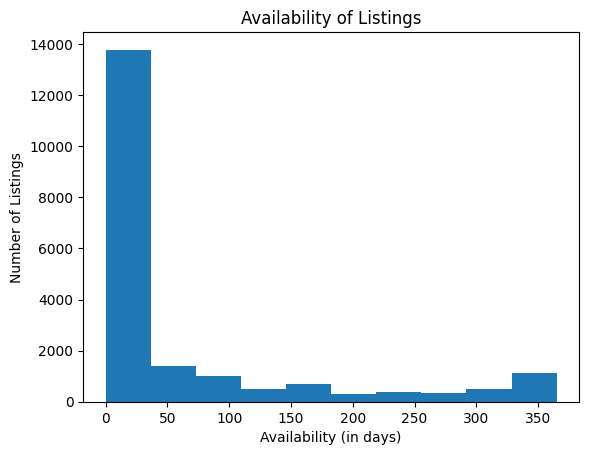

In [139]:
plt.hist(listings['availability_365'])
plt.xlabel('Availability (in days)')
plt.ylabel('Number of Listings')
plt.title('Availability of Listings')
plt.show()

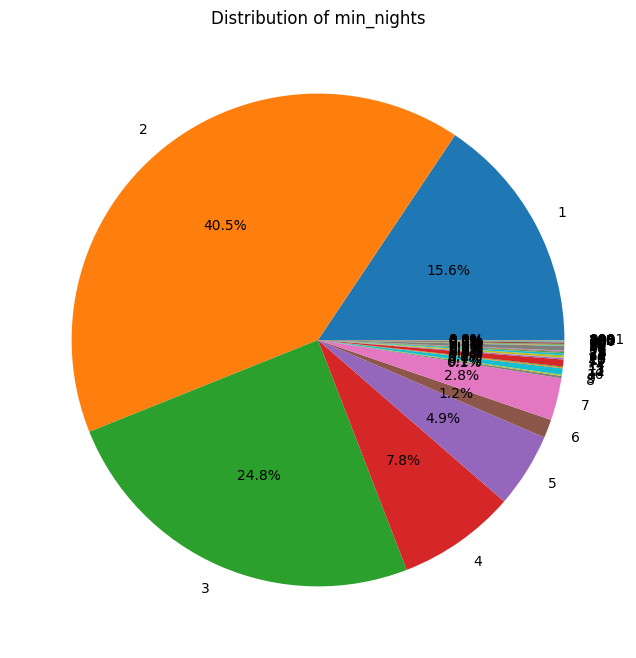

In [140]:
min_nights_counts = listings['minimum_nights'].value_counts().sort_index()
fig = plt.figure(figsize=(12,8))
plt.pie(min_nights_counts.values, labels=min_nights_counts.index, autopct='%1.1f%%')
plt.title('Distribution of min_nights')
plt.show()

***